# Пример уменьшения размерности

Рассмотрим основные моменты уменьшения размерности на примере из лекции (рукописные цифры). 

Подключим требуемые библиотеки.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет.

In [2]:
X = datasets.load_digits().data #Объекты
y = datasets.load_digits().target #Отклики

Посмотрим, что из себя представляет, например, нулевой объект датасета.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


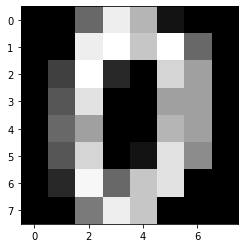

In [3]:
print(X[0])
plt.imshow(X[0].reshape([8,8]), cmap='Greys_r')

Уменьшим размерность при помощи библиотеки `sklearn`. Отдельно обратим ваше внимание на параметр `svd_solver` — параметр, отвечающий за способ построения матричного разложения. Чтобы получать согласованные с лекцией результаты, рекомендуется использовать параметр `svd_solver = 'full'`.

Оказывается, для того чтобы получить новые координаты объектов, достаточно написать две следующие строчки.

In [4]:
pca = PCA(n_components = 2, svd_solver = 'full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit_transform(X) #X_transformed — ndarray объектов, где каждый объект описывается двумя ГК

Выведем полученные новые координаты объекта с индексом 0.

In [5]:
X_transformed[0]

array([-1.25946645, 21.27488348])

Теперь обсудим детали. Матрица весов хранится в поле `components_` класса `pca` и имеет размеры *(количество ГК, начальное количество признаков)*. Это значит, что матрица весов $\varPhi$, описанная в лекции, связана с матрицей весов `pca.components_`, выдаваемой инструментом, соотношением
$$
\varPhi = (\text{pca.components_})^T.
$$

In [6]:
print(pca.components_.shape) # В нашем случае матрица размер 2 х 64
pca.components_

(2, 64)


array([[-1.77484909e-19, -1.73094651e-02, -2.23428835e-01,
        -1.35913304e-01, -3.30323092e-02, -9.66340844e-02,
        -8.32943805e-03,  2.26900082e-03, -3.20516495e-04,
        -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
        -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,
         4.47779518e-03, -4.94136398e-05, -7.95419375e-02,
         8.33951454e-02,  2.15915342e-01, -1.72126801e-01,
        -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
         9.85488574e-05,  6.42319144e-02,  2.54093316e-01,
        -3.56771026e-02, -2.09462569e-01, -4.31311420e-02,
         5.13118688e-02,  2.13422732e-04, -0.00000000e+00,
         1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
         8.52007908e-02,  3.72982855e-02,  2.15866980e-02,
        -0.00000000e+00,  1.28865585e-03,  1.06945287e-01,
         3.03067457e-01,  2.47813041e-01,  2.09637296e-01,
         1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
         6.93023548e-04, -8.35144239e-03, -5.58598986e-0

Установив связь между тем, что выдает инструмент, и тем, что описано в лекции, наглядно продемонстрируем, что новые координаты объектов можно получить и непосредственным умножением матрицы объектов на матрицу весов. Отметим, что в таком случае исходные координаты объектов необходимо предварительно центрировать.

In [7]:
# Выведем новые координаты объекта с индексом 0
np.dot(X-X.mean(axis=0), pca.components_.T)[0]

array([-1.25946645, 21.27488348])

In [8]:
# Если использовать библиотечный метод, то все преобразования производятся автоматически
pca.transform([X[0]])

array([[-1.25946645, 21.27488348]])

Изобразим первые 100 объектов в виде точек на плоскости. В силу того, что нам известны отклики, отметим одинаковые цифры одинаковым цветом.

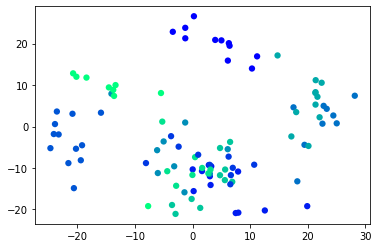

In [9]:
plt.scatter(X_transformed[:101, 0], X_transformed[:101, 1], c=y[:101], edgecolor='none', s=40,cmap='winter')

Если представить, что отклики нам неизвестны, то картина становится гораздо менее радужной. Объединение объектов в группы интуитивно, конечно, возможно, но с существенными оговорками.

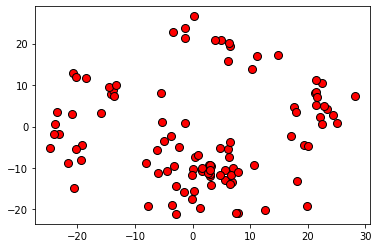

In [10]:
plt.plot(X_transformed[:101, 0], X_transformed[:101, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

Для дальнейшего анализа нам удобно будет построить не 2, а все 64 ГК (хотя, конечно, это можно было сделать и сразу, а картинку строить лишь по первым двум).

In [11]:
pca = PCA(n_components=64, svd_solver='full')
X_full = pca.fit(X).transform(X)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [12]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.149, 0.285, 0.403, 0.487, 0.545, 0.594, 0.637, 0.674, 0.707,
       0.738, 0.762, 0.785, 0.803, 0.821, 0.835, 0.849, 0.863, 0.875,
       0.885, 0.894, 0.903, 0.911, 0.919, 0.926, 0.933, 0.939, 0.945,
       0.95 , 0.955, 0.959, 0.963, 0.966, 0.97 , 0.973, 0.976, 0.979,
       0.982, 0.984, 0.986, 0.988, 0.99 , 0.992, 0.993, 0.995, 0.996,
       0.997, 0.998, 0.999, 0.999, 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

Построим график зависимости доли объясненной дисперсии от количества используемых ГК. Подробное описание произведено в лекции.

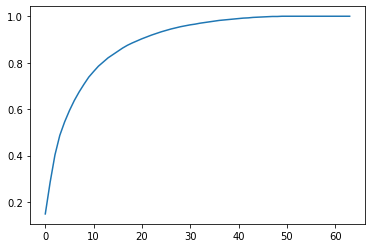

In [13]:
plt.plot(np.arange(64), explained_variance, ls = '-')